# Анализ экономических показателей регионов России

На основании открытых данных, представленных ПАО Сбербанк, попробуем проанализировать представленные показатели о всех регионах России и как с годами меняются показатели на примере конкретного региона - Приморского края.

## Оглавление
1. [Предобработка данных](#introduction)
   1. [Импорт данных](#import)
   2. [Описание параметров](#parameters)
   3. [Предобработка данных](#preprocessing)
2. [Анализ данных](#analysis)
   1. [Топ 20 регионов по различным показателям](#top20)
      1. [Средняя заработная плата](#salary)
      2. [Среднее количество заявок на потребительские кредиты](#loans)
      3. [Размер потребительского кредита](#average_loan)
      4. [Расходы по карте](#cards)
      5. [Выводы](#conclusion)
   2. [Приморский край](#primorsky_krai)
      1. [Предобработка данных](#primorsky_preprocessing)
      2. [Разбивка показателей по годам](#years)
      3. [Выводы](#primorsky_conclusion)

## 1. Предобработка данных <a name="introduction"></a>


### 1.1 Импорт данных <a name="import"></a>
Импортируем необходимые библиотеки и загрузим таблицу с данными.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import base64
import io
import scipy.misc
import codecs
from IPython.display import HTML
from matplotlib_venn import venn2
from subprocess import check_output

from matplotlib.ticker import ScalarFormatter
import itertools
from translate import Translator
import time

In [22]:
data = pd.read_csv("~/data/df.csv", index_col="region", parse_dates=True)

In [23]:
data.head()

,name,date,value
region,,,
Russia,The number of applications for consumer loans,2013-01-15,571147
Russia,The number of applications for consumer loans,2013-02-15,504508
Russia,The number of applications for consumer loans,2013-03-15,628803
Russia,The number of applications for consumer loans,2013-04-15,836054
Russia,The number of applications for consumer loans,2013-05-15,867235


In [24]:
pd.unique(data['name'])

array(['The number of applications for consumer loans',
       'Average consumer loan application',
       'The number of applications for mortgages',
       'The average amount of a mortgage application',
       'Number of new deposits', 'Average amount of new deposit',
       'Average salary', 'Average pension',
       'On average rubles on current account per person',
       'On average, deposits in rubles per person',
       'Average spending on cards', 'Average Fast Food format Check',
       'Average check in Restaurant format',
       'Average spending in a fast food restaurant',
       'Average spending in a restaurant'], dtype=object)

Видно, что параметры, по которым будет проходить анализ, представлены в одной колонке name, что неудобно для дальнейшей работы, поэтому разнесём эти параметры по отдельным столбцам

In [25]:
data = data.pivot_table(index=["region", "date"], columns="name", values="value", aggfunc="mean", fill_value=0).reset_index()

### 1.2 Описание параметров <a name="parameters"></a>

В получившейся таблице имеются следующие столбцы:

* **Расходы**
  * *'Average spending in a fast food restaurant', 'Average spending in a restaurant'* - Средние расходы в фаст фуде/в ресторане
  * *'Average Fast Food format Check', 'Average check in Restaurant format'* - Средний чек в фаст фуде/в ресторане
  * *'Average spending on cards'* - Средние расходы по карте
* **Доходы и сбережения**
  * *'Average salary'* - Средняя заработная плата
  * *'Average pension'* - Средняя пенсия
  * *'On average rubles on current account per person'* - В среднем рублей на расчетном счете на человека
  * *'On average, deposits in rubles per person'* - В среднем размер вклада на человека
* **Банковские операции**
  * Потребительский кредит
    * *'The number of applications for consumer loans'* - Количество заявок на потребительские кредиты
    * *'Average consumer loan application'* - Средний размер потребительского кредита
  * Ипотека
    * *'The number of applications for mortgages'* - Количество заявок на ипотеку
    * *'The average amount of a mortgage application'* - Средний размер ипотеки
  * Депозиты
    * *'Number of new deposits'* - Количество новых депозитов
    * *'Average amount of new deposit'* - Средний размер депозита

In [26]:
data.head()

name,region,date,Average Fast Food format Check,Average amount of new deposit,Average check in Restaurant format,Average consumer loan application,Average pension,Average salary,Average spending in a fast food restaurant,Average spending in a restaurant,Average spending on cards,Number of new deposits,On average rubles on current account per person,"On average, deposits in rubles per person",The average amount of a mortgage application,The number of applications for consumer loans,The number of applications for mortgages
0,Altai region,2013-01-15,0,0,0,133509,0,0,0,0,0,0,0,0,968154,13423,508
1,Altai region,2013-02-15,0,0,0,150030,0,0,0,0,0,0,0,0,957201,12440,641
2,Altai region,2013-03-15,0,0,0,151795,0,0,0,0,0,0,0,0,974481,15906,853
3,Altai region,2013-04-15,0,0,0,148752,0,0,0,0,0,0,0,0,985195,22172,1072
4,Altai region,2013-05-15,0,0,0,150903,0,0,0,0,0,0,0,0,955750,22642,807


### 1.3 Предобработка данных<a name="preprocessing"></a>

Удалим все строки с регионом "Russia", чтобы обобщённые по всей стране данные не создавали большие выбросы при сравнении с данными по отдельным регионам

In [30]:
data = data[data["region"] != "Russia"]

Добавим столбец год, чтобы было удобнее анализировать изменения признаков по годам.

In [31]:
data['year'] = data["date"].apply(lambda t: time.strptime(t, '%Y-%m-%d').tm_year)

Посмотрим, сколько записей представлено за каждый год. Из графика ниже видно, что вряд ли будет возможно делать выводы о показателях за 2019 год, так как за этот год слишком мало записей.

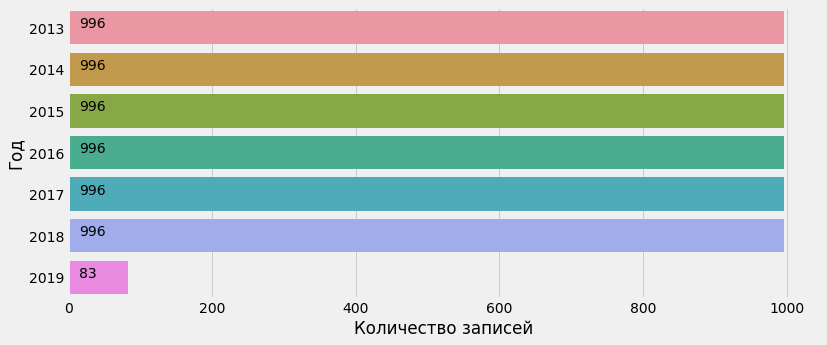

In [32]:
plt.subplots(figsize=(12,5))
ax = sns.countplot(y=data['year'])

for i, year in enumerate(pd.unique(data['year'])):
    ax.text(15, i, data['year'][data['year'] == year].count())

plt.xlabel('Количество записей')
plt.ylabel('Год')
plt.show()

## 2. Анализ данных <a name="analysis"></a>

### 2.1 Топ 20 регионов по различным показателям <a name="top20"></a>

Рассмотрим какие из регионов имеют самые высокие показатели по таким параметрам, как:
* Заработная плата,
* Количество заявок на потребительские кредиты,
* Средний размер потребительских кредитов,
* Средние расходы по карте  

и посмотрим есть ли между этими параметрами взаимосвязь.

#### Средняя заработная плата<a name="salary"></a>

Самые высокие заработные платы в удалённых регионах Дальневосточного федерального округа таких, как Чукотский автономный округ, Магаданская область, Камчатский край и в Северных регионах таких, как Ямало-Ненецкий автономный округ, Ненецкий автономный округ, Ханты-Мансийский автономный округ, что имеет под собой такие основания, как удалённость регионов, тяжёлые климатические условия, дороговизна продуктов потребления.
Помимо удалённых регионов вверху списка находятся Москва и Питер, что обусловлено статусами столиц у этих двух городов.

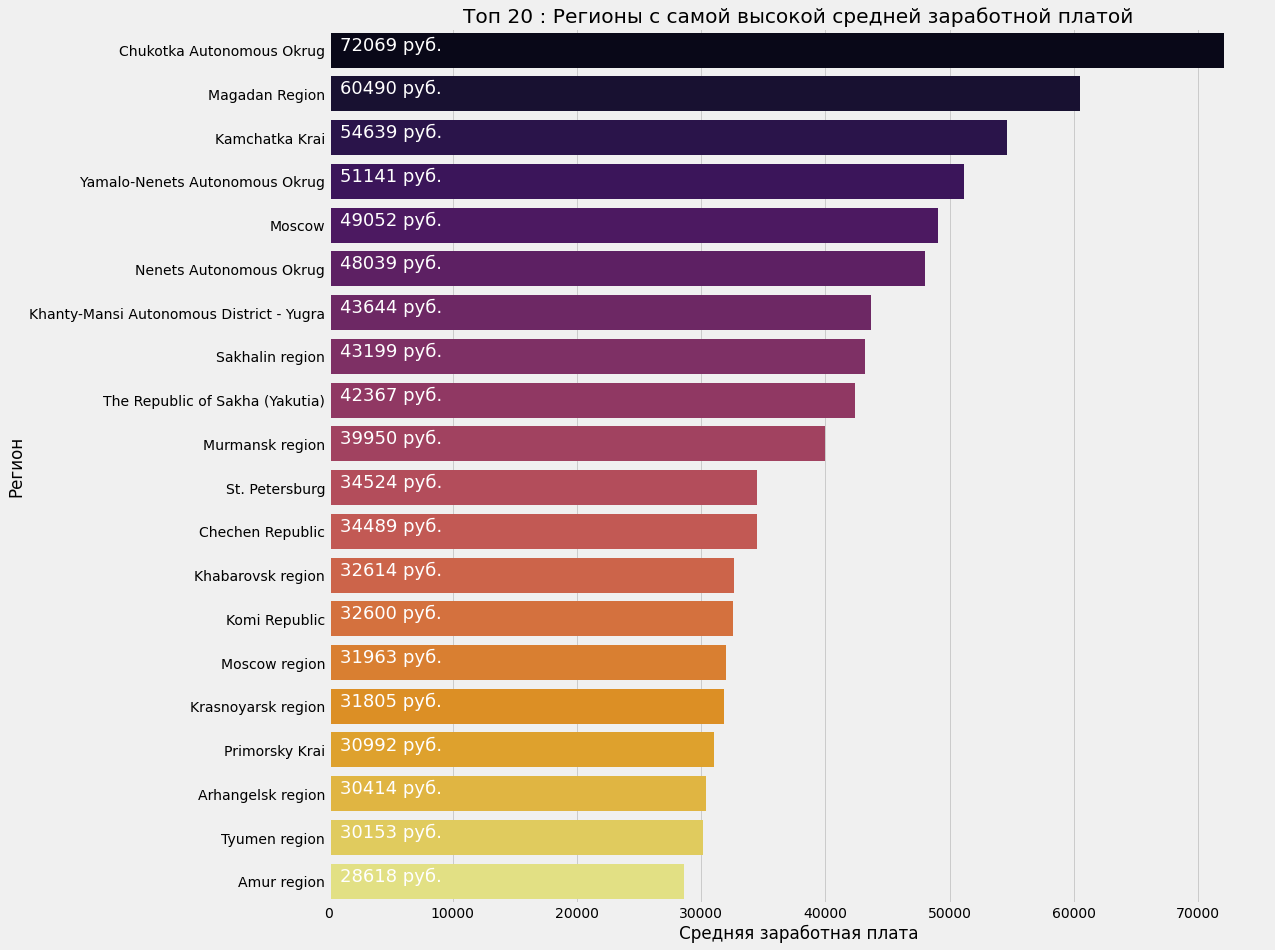

In [33]:
#Исследуем, в каких регионах самые высокие заработные платы (среднее)
region_val = data.groupby("region")["Average salary"].agg(np.median).sort_values(ascending=False)[:20].to_frame()
a = sns.barplot(region_val["Average salary"],region_val.index,palette='inferno')
plt.title('Топ 20 : Регионы с самой высокой средней заработной платой')
plt.xlabel('Средняя заработная плата')
plt.ylabel('Регион')
fig=plt.gcf()
fig.set_size_inches(15,15)


for i, region in enumerate(region_val.index):
    val = region_val.reset_index()
    a.text(5000, i, str(int(val[val["region"] == region]['Average salary'])) + ' руб.', color='white', horizontalalignment='center',
          fontsize=18)

plt.show();

#### Среднее количество заявок на потребительские кредиты<a name="loans"></a>

Явным лидером по количеству заявок на потребительские кредиты является Москва, после неё идут Краснодарский край и Московская область. Возможно, данный отрыв обусловлен более благоприятным уровнем жизни в данных регионах и поэтому население не боится брать кредиты.

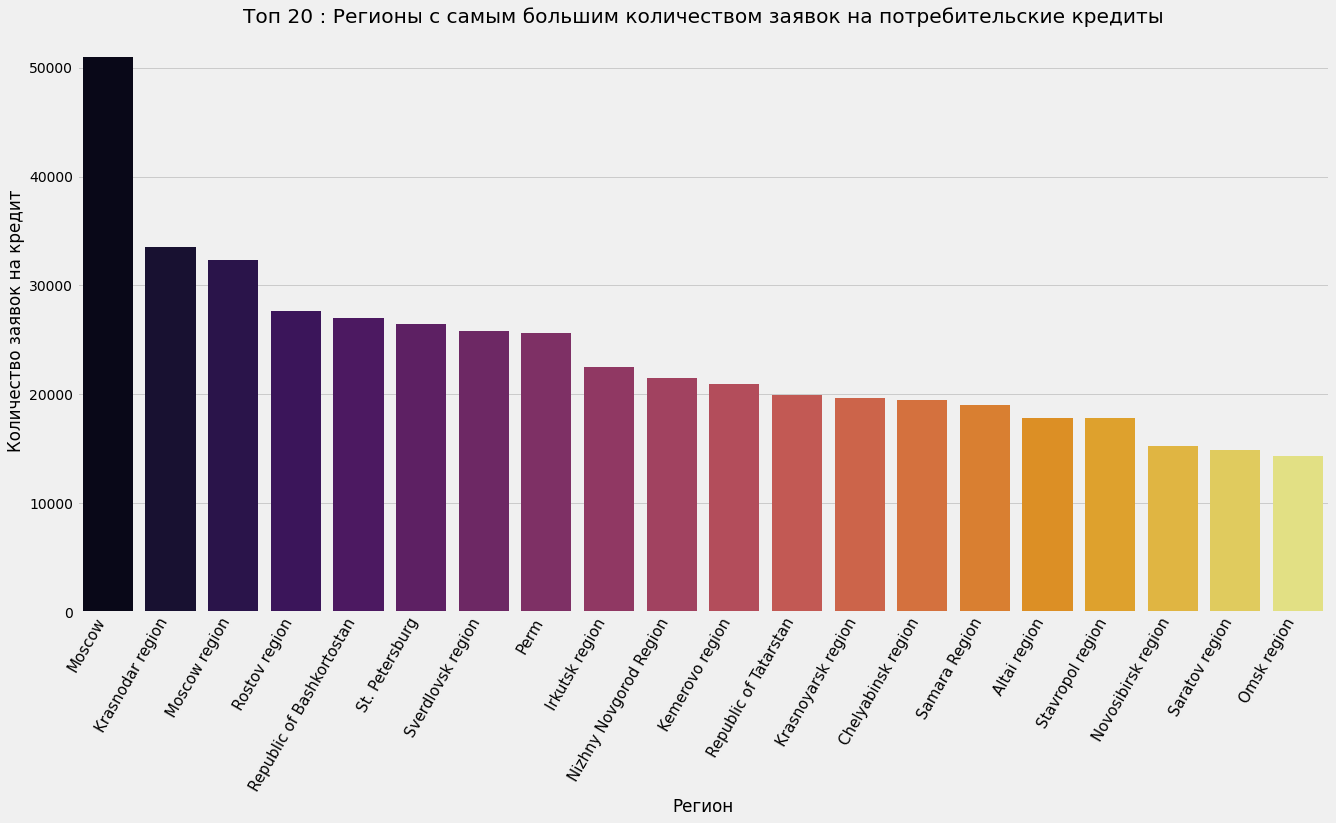

In [23]:
#среднее количество заявок
region_val = data.groupby("region")["The number of applications for consumer loans"].agg(np.mean).sort_values(ascending=False)[:20].to_frame()
ax = sns.barplot(region_val.index, region_val["The number of applications for consumer loans"], palette='inferno')
plt.title('Топ 20 : Регионы с самым большим количеством заявок на потребительские кредиты')
plt.xlabel('Регион')
plt.ylabel('Количество заявок на кредит')
fig=plt.gcf()
fig.set_size_inches(20,10)

for axis in [ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)


plt.xticks(rotation=60, horizontalalignment='right', fontsize=15)
#a.barplot

plt.show()

#### Размер потребительского кредита<a name="average_loan"></a>

Самые высокие размеры кредитов, как и заработные платы, в отдалённых Северных и Дальневосточных регионах, что обусловлено дороговизной жизни в этих регионах.

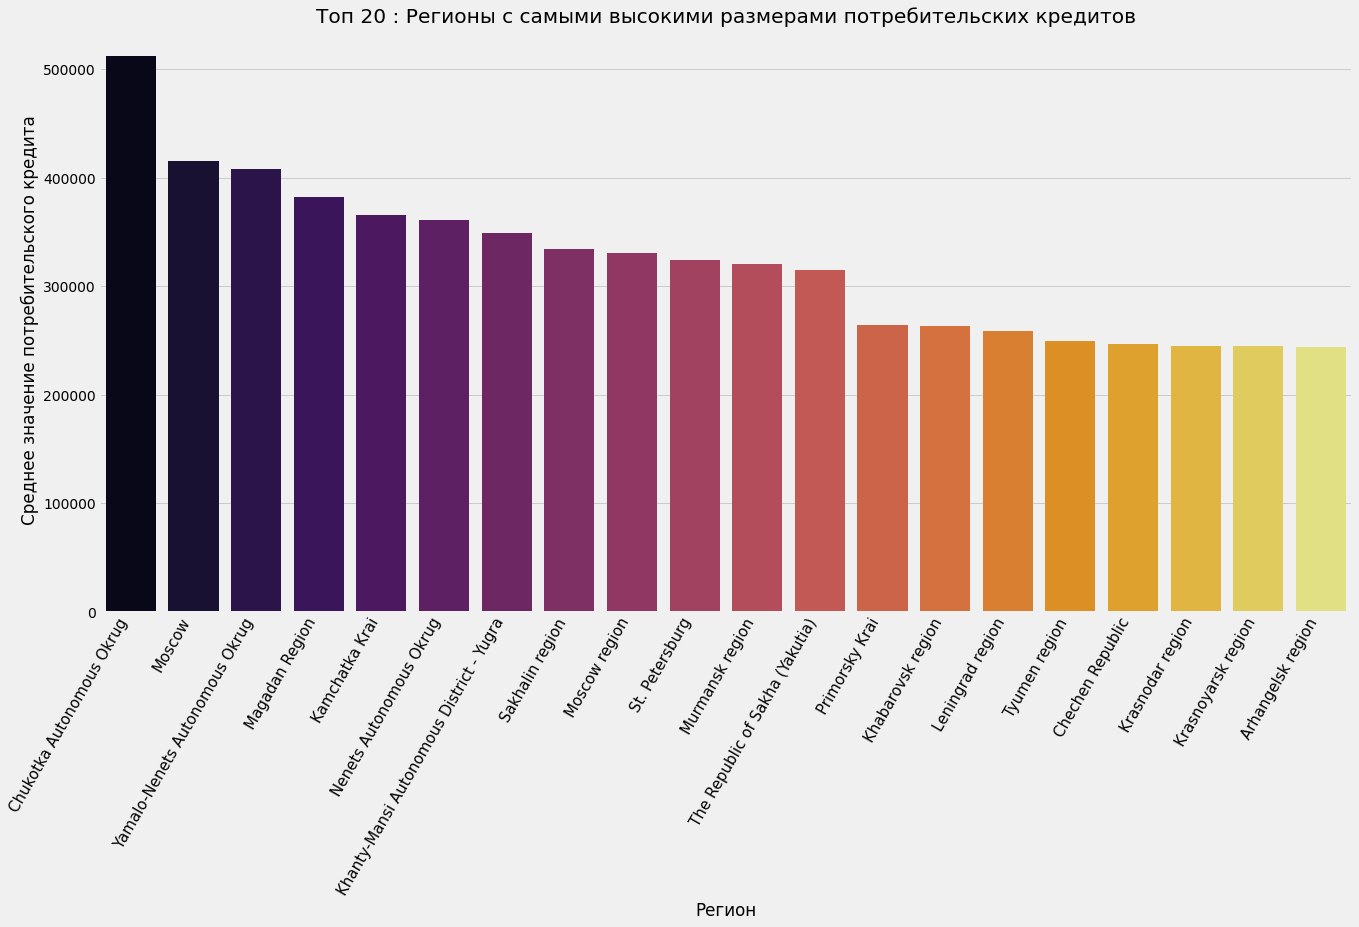

In [27]:
region_val = data.groupby("region")["Average consumer loan application"].agg(np.mean).sort_values(ascending=False)[:20].to_frame()
ax = sns.barplot(region_val.index, region_val["Average consumer loan application"], palette='inferno')
plt.title('Топ 20 : Регионы с самыми высокими размерами потребительских кредитов')
plt.xlabel('Регион')
plt.ylabel('Среднее значение потребительского кредита')
fig=plt.gcf()
fig.set_size_inches(20,10)

for axis in [ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)


plt.xticks(rotation=60, horizontalalignment='right', fontsize=15)

plt.show()

#видно, что коррелирует с зарплатой

#### Расходы по карте<a name="cards"></a>

В отдалённых регионах России уровень затрат у населения выше, чем в других регионах.

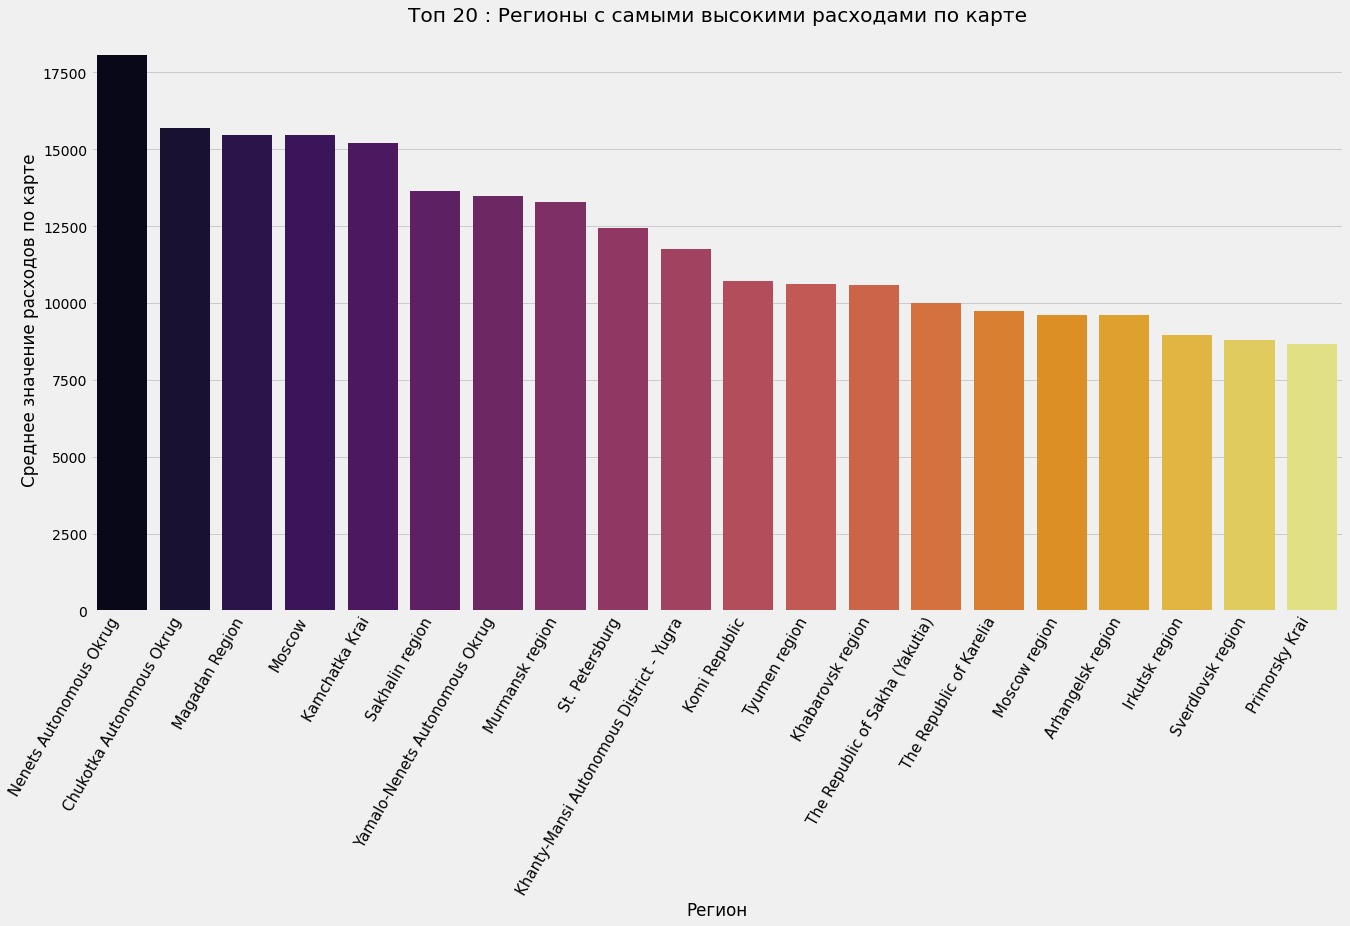

In [25]:
region_val = data.groupby("region")["Average spending on cards"].agg(np.mean).sort_values(ascending=False)[:20].to_frame()
ax = sns.barplot(region_val.index, region_val["Average spending on cards"], palette='inferno')
plt.title('Топ 20 : Регионы с самыми высокими расходами по карте')
plt.xlabel('Регион')
plt.ylabel('Среднее значение расходов по карте')
fig=plt.gcf()
fig.set_size_inches(20,10)

for axis in [ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)


plt.xticks(rotation=60, horizontalalignment='right', fontsize=15)

plt.show()

In [364]:
#Как видим, на последних двух графиках отображены в основном одни и те же регионы, они же отображены в рейтинге заработных плат.
#Что логично, на графиках представлены две столицы, и удалённые регионы (например, Камчатка), где расходы выше, поэтому выше и заработные платы, и средний потребительский кредит

#### Выводы <a name="conclusion"></a>

Из представленных выше графиков видно, что в целом уровень заработных плат коррелирует с уровнем расходов населения и размерами кредитов, выдаваемых населению, однако количество заявок на кредит скорее связано с уровнем жизни в регионе.
Явно видно, что на показатели расходов/доходов сильно влияет географическое положение региона и является ли он столицей или прилигающей к столице области.

### 2.2 Приморский край <a name="primorsky_krai"></a>

Посмотрим на примере Приморского края как изменялись показатели за период с 2013 по 2019 гг.

#### Предобработка данных <a name="primorsky_preprocessing"></a>

In [34]:
#поисследуем Приморский край
new_data = data[data["region"] == "Primorsky Krai"]
new_data = new_data.rename(columns={'Average check in Restaurant format' : 'Average check in Restaurant',
                        'Average Fast Food format Check' : 'Average check in Fast Food'})

Посмотрим, сколько записей представлено за каждый год по Приморскому краю.

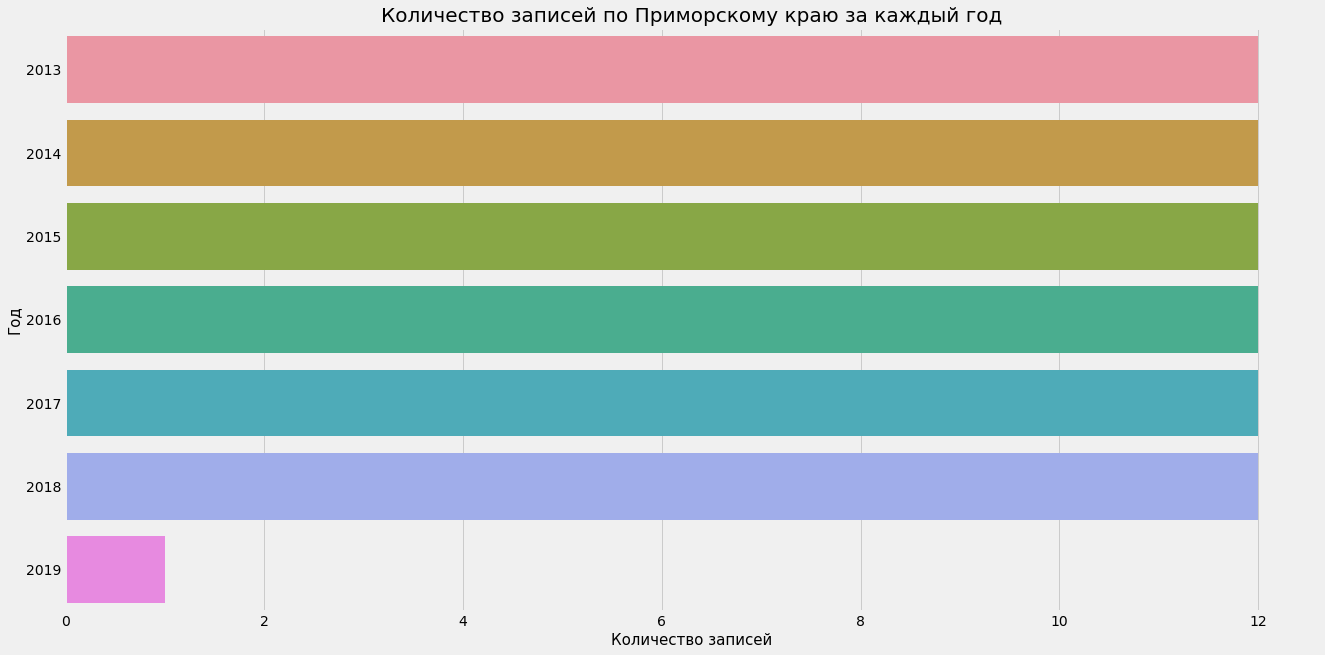

In [35]:
plt.subplots(figsize=(20,10))
ax = sns.countplot(y=new_data['year'])


plt.xlabel('Количество записей', fontsize=15)
plt.ylabel('Год', fontsize=15)
plt.title('Количество записей по Приморскому краю за каждый год', fontsize=20)
plt.show()

Так как по 2019 представлена по Приморскому краю всего одна запись за период с 2018-12-15 по 2019-01-15 января, мы не можем оценивать показатели за 2019 год, но поскольку половина данных по этой одной записи относится к 2018, не будет её удалять, вместо этого будем относить её к 2018 году.

In [36]:
new_data.loc[new_data["year"]==2019, "year"] = 2018

#### Разбивка показателей по годам <a name="years"></a>

Построим графики по каждому параметру, разбив показатели по годам.

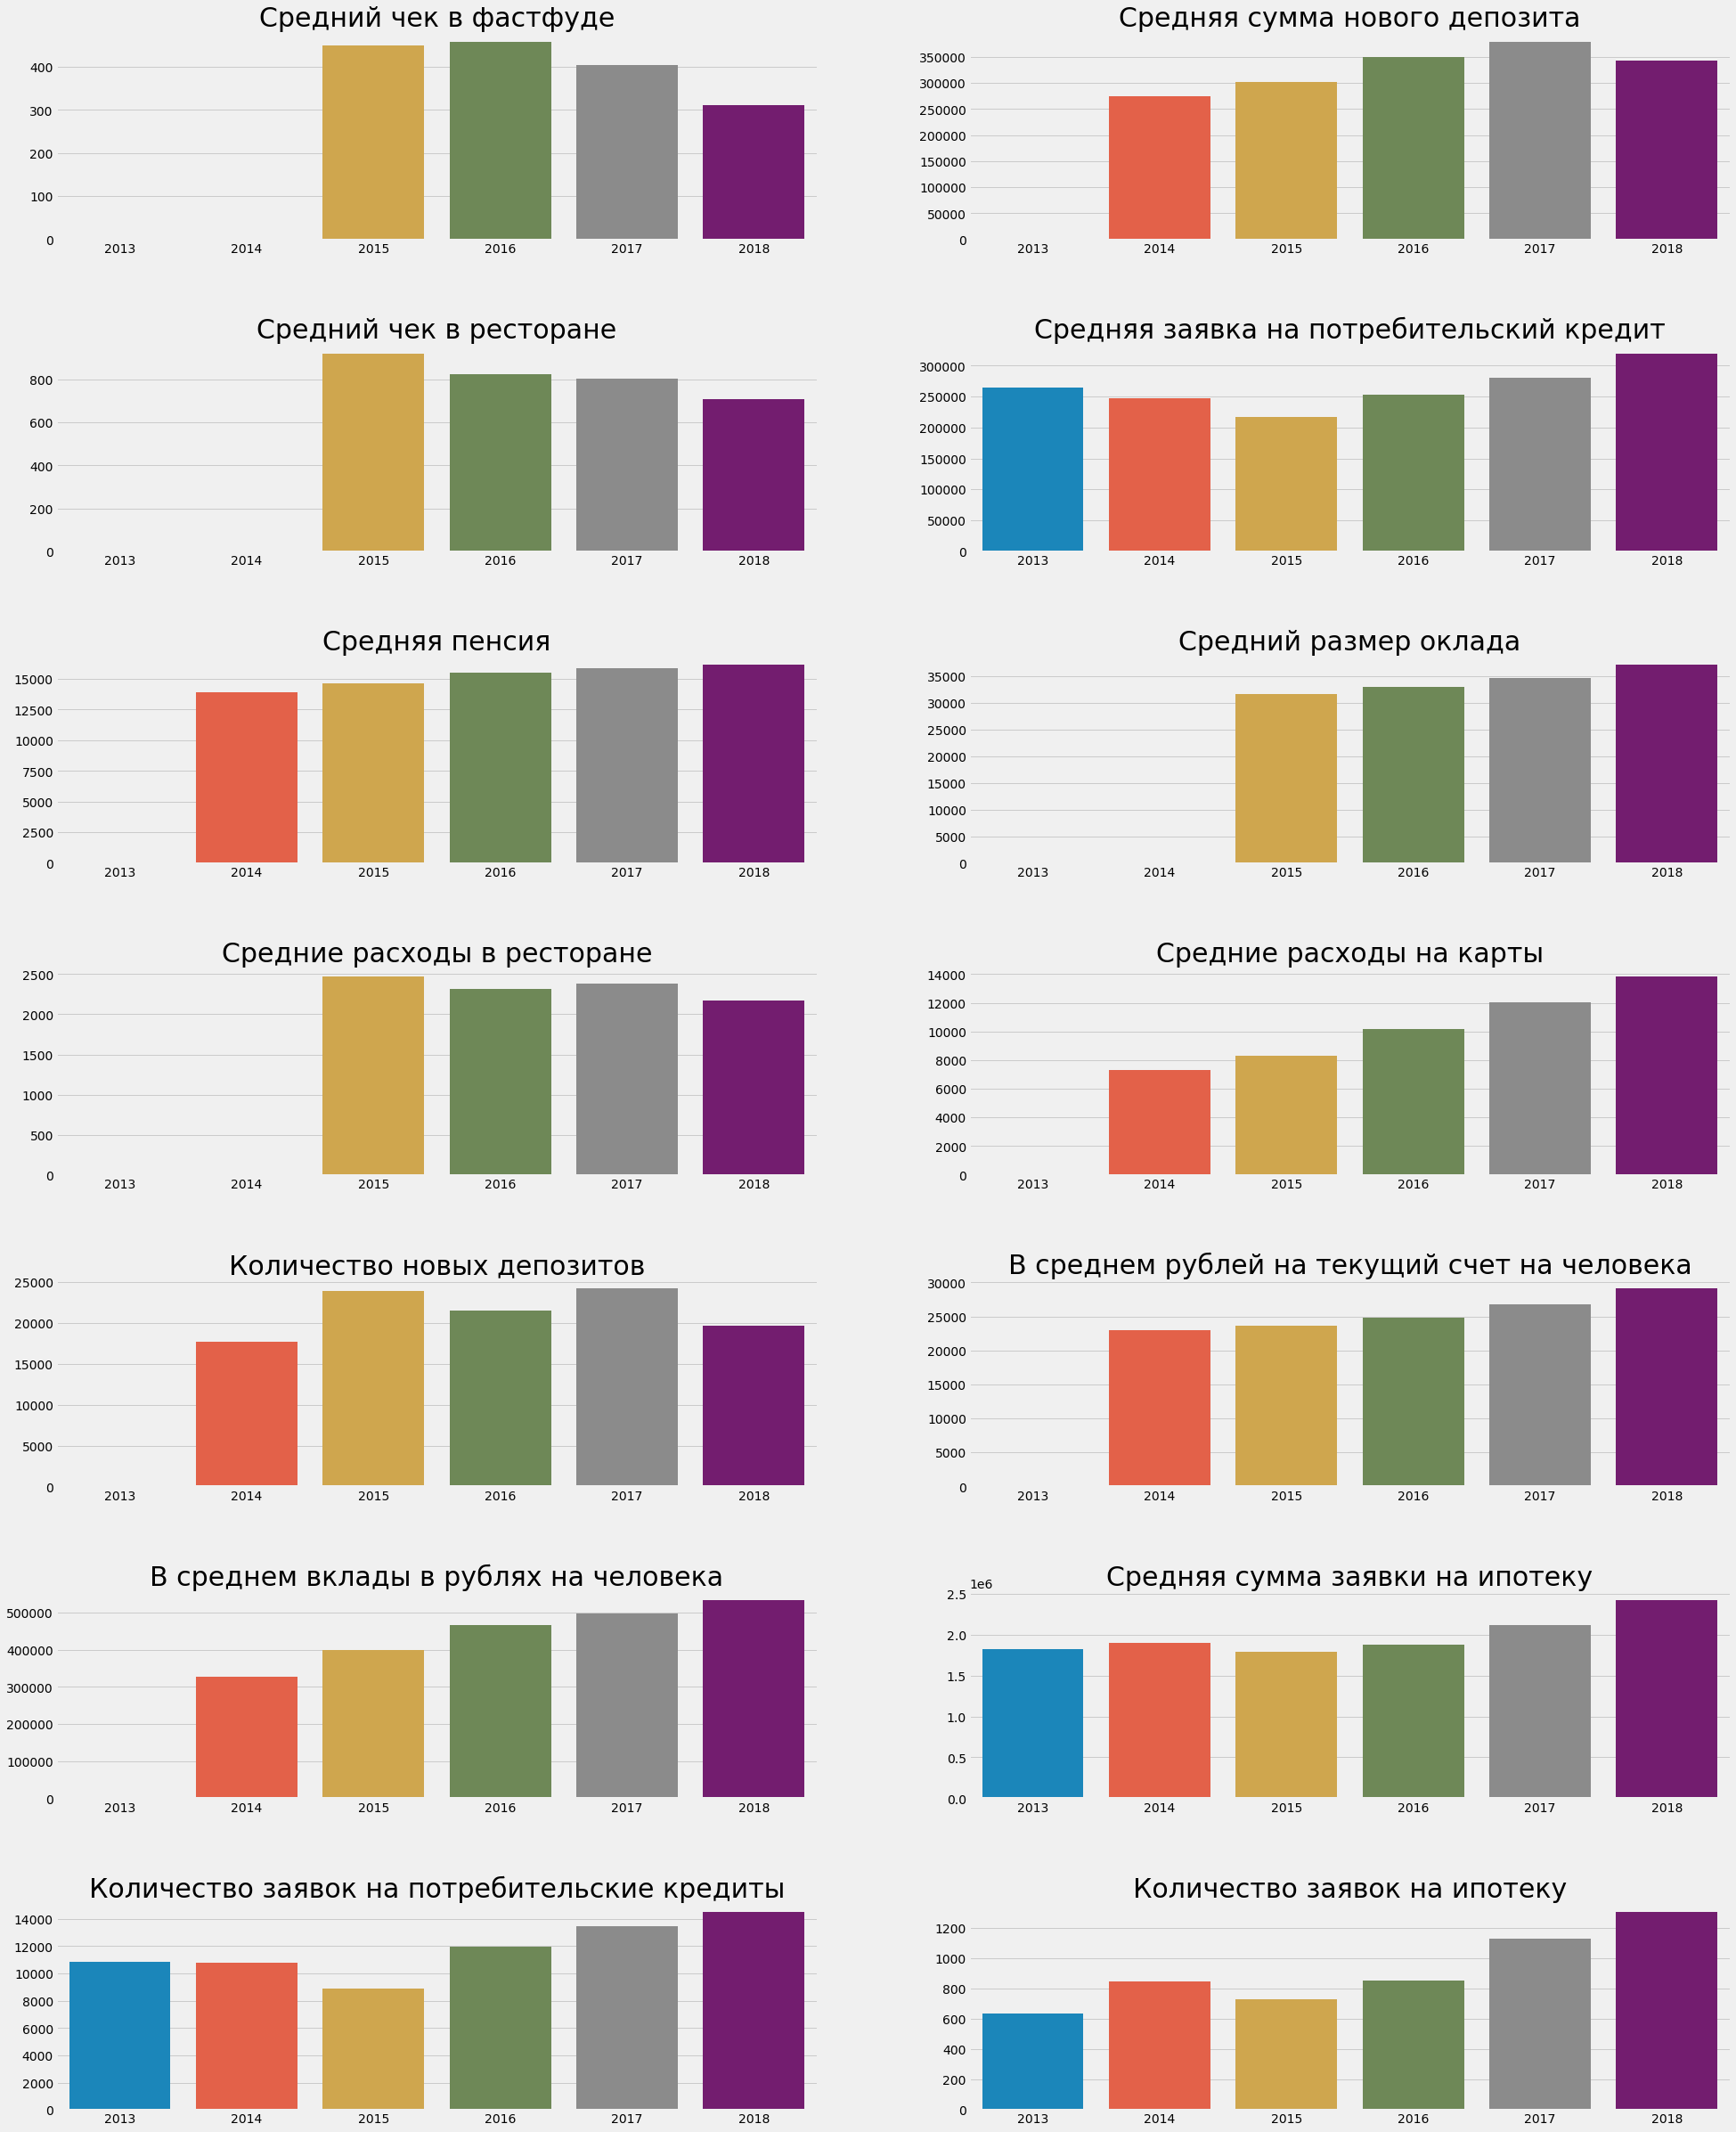

In [37]:
plt.subplots(figsize=(30,40))
col=new_data.columns.drop(['region', 'date', 'year', 'Average spending in a fast food restaurant'])
translator= Translator(to_lang="Russian")
length=len(col)

for i,j in itertools.zip_longest(col,range(length)):
    plt.subplot((length/2),2,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    
    aa = new_data.groupby(["year"])[i].agg(np.mean).to_frame().reset_index()
    sns.barplot(y=aa[i], x=aa["year"])
    #new_data[i].hist(bins=10,edgecolor='black')
    #plt.axvline(new_data.groupby(["year"])[i].agg(np.mean).mean(),linestyle='dashed',color='r')
    plt.title(translator.translate(i),size=30)
    plt.xlabel('')
    plt.ylabel('')
    

plt.show()

#### Выводы<a name="primorsky_conclusion"></a>

Из графиков видно, что потребительские расходы (Средний чек в фаст фуде/ресторане, расходы в ресторанах) с годами уменьшались. Средние расходы оплатой картой увеличивались, что скорее всего связано с тем, что оплата картой становилась с годами доступнее и население всё чаще использует для оплаты карту, вместо наличной оплаты.

С каждым годом увеличивается количество банковских операций таких, как количество заявок на потребительские кредиты, количество заявок на ипотеку, увеличивается средний размер ипотеки, вкладов, потребительских кредитов.

Интересно, что количество депозитов и средний размер депозита в целом уменьшается. Возможно, это связано с тем, что население предпочитает обычные вклады, которые с каждым годом становится открыть всё проще.